# Movimiento orbital

In [1]:
%matplotlib inline

In [2]:
import numpy
from numpy import linspace, zeros, sqrt, arctan2, sin, cos
from matplotlib import pyplot as plt

In [3]:
def F(x, y, M=1, m=1):
    # G = 9 * (10 ** -11)
    G = 1
    theta = arctan2(y, x)
    f = - G * M * m / (x ** 2 + y ** 2)
    return f * cos(theta), f * sin(theta)

In [4]:
def potential_energy(x, y, M=1, m=1):
    # G = 9 * (10 ** -11)
    G = 1
    return - G * M * m / sqrt(x ** 2 + y ** 2)

In [5]:
def kinetic_energy(vx, vy, m):
    return 0.5 * m * (vx * vx + vy * vy)

In [6]:
M = 2 # kg
m = 1 # kg

N = 40000
to = 0
tf = 40
dt = (tf - to) / N
t = linspace(to, tf, N + 1)

x = zeros(t.shape)
y = zeros(t.shape)

vx = zeros(t.shape)
vy = zeros(t.shape)

ax = zeros(t.shape)
ay = zeros(t.shape)

x[0] = 1 # m
y[0] = 0 # m

vx[0] = 0  # m/s
vy[0] = 1  # m/s

In [7]:
for i, _ in enumerate(t[1:] , 1):
    vx[i] = vx[i-1] + ax[i-1] * dt
    vy[i] = vy[i-1] + ay[i-1] * dt

    x[i] = x[i-1] + vx[i] * dt
    y[i] = y[i-1] + vy[i] * dt

    ax[i], ay[i] = F(x[i], y[i], M, m)
    ax[i], ay[i] = ax[i] / m, ay[i] / m

    # print("{0:5d}  {1:10.4f}  {2:10.4f}  {3:10.4f}  {4:10.4f}  {5:10.4f}"\
    #     .format(i, time[i], x[i], y[i], vx[i], vy[i]))

## Trayectoria

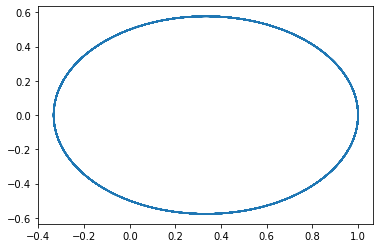

In [8]:
plt.plot(x, y)

## Energía

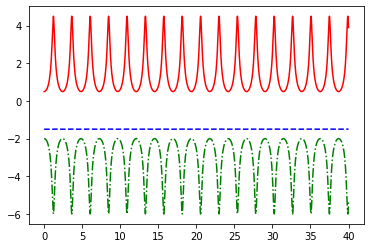

In [9]:
plt.plot(
    t, kinetic_energy(vx, vy, m), 'r-',
    t, potential_energy(x, y, M, m), 'g-.',
    t, kinetic_energy(vx, vy, m) + potential_energy(x, y, M, m), 'b--',
)